# Part 1: Regression

## Question 1

In [15]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from utils.visualization_tb import part1_scatter, plot_one

# Setting the seed
np.random.seed(0)
# Creating data
n = 15
X = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(X)+X/6 + np.random.randn(n)/10

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

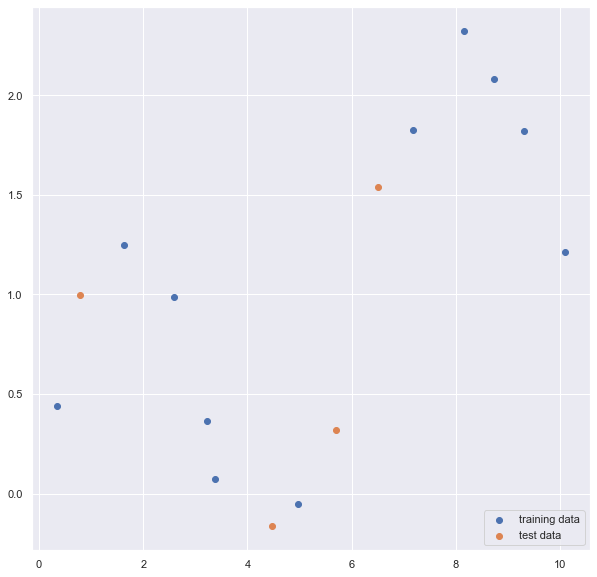

In [2]:
fig = part1_scatter(X_train, X_test, y_train, y_test)

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def answer_one():
    to_predict = np.linspace(0, 10, 100)
    model = LinearRegression()
    predictions_list = []

    for degree in (1, 3, 6, 9):
        poly = PolynomialFeatures(degree = degree)
        X_poly = poly.fit_transform(X.reshape(-1, 1))
        to_predict_poly = poly.fit_transform(to_predict.reshape(-1, 1))

        X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state = 0)
        
        model.fit(X_train, y_train)

        predictions = model.predict(to_predict_poly)
        predictions_list.append(predictions)

    return np.vstack(predictions_list)

In [74]:
answer_one()

array([[ 2.53040195e-01,  2.69201547e-01,  2.85362899e-01,
         3.01524251e-01,  3.17685603e-01,  3.33846955e-01,
         3.50008306e-01,  3.66169658e-01,  3.82331010e-01,
         3.98492362e-01,  4.14653714e-01,  4.30815066e-01,
         4.46976417e-01,  4.63137769e-01,  4.79299121e-01,
         4.95460473e-01,  5.11621825e-01,  5.27783177e-01,
         5.43944529e-01,  5.60105880e-01,  5.76267232e-01,
         5.92428584e-01,  6.08589936e-01,  6.24751288e-01,
         6.40912640e-01,  6.57073992e-01,  6.73235343e-01,
         6.89396695e-01,  7.05558047e-01,  7.21719399e-01,
         7.37880751e-01,  7.54042103e-01,  7.70203454e-01,
         7.86364806e-01,  8.02526158e-01,  8.18687510e-01,
         8.34848862e-01,  8.51010214e-01,  8.67171566e-01,
         8.83332917e-01,  8.99494269e-01,  9.15655621e-01,
         9.31816973e-01,  9.47978325e-01,  9.64139677e-01,
         9.80301028e-01,  9.96462380e-01,  1.01262373e+00,
         1.02878508e+00,  1.04494644e+00,  1.06110779e+0

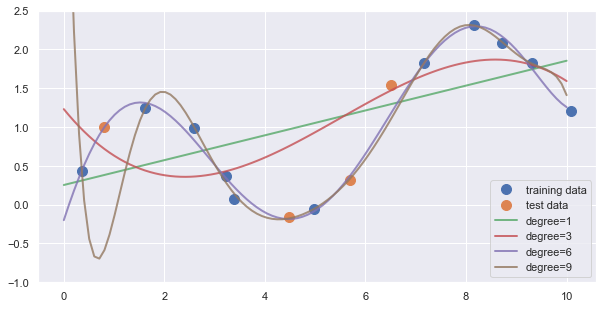

In [4]:
plot_one(answer_one(), X_train, X_test, y_train, y_test)

## Question 2

In [6]:
from sklearn.metrics import r2_score

def answer_two():
    train_scores = []
    test_scores = []

    for degree in range(10):
        poly = PolynomialFeatures(degree = degree)
        X_poly = poly.fit_transform(X.reshape(-1, 1))

        X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state = 0)

        model = LinearRegression()
        model.fit(X_train, y_train)

        train_score = model.score(X_train, y_train)
        test_score = model.score(X_test, y_test)

        train_scores.append(train_score)
        test_scores.append(test_score)

    return np.array(train_scores), np.array(test_scores)

## Question 3

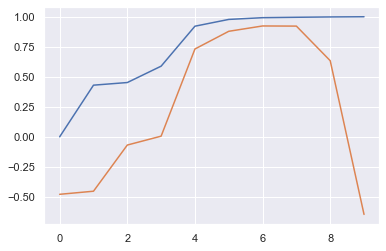

In [33]:
scores = answer_two()
scores_df = pd.DataFrame(t, index = ["train_score", "test_score"]).T
scores_df["evaluation"] = ""

scores_df = pd.DataFrame(t, index = ["train_score", "test_score"]).T

plt.plot(scores_df.train_score, label = "train score")
plt.plot(scores_df.test_score, label = "test score")
plt.show()

In [34]:
def answer_three():
    return 0, 9, 7

(0, 3, 7)

## Question 4

In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, LinearRegression

def answer_four():
    poly = PolynomialFeatures(degree = 12)
    X_poly = poly.fit_transform(X.reshape(-1, 1))

    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state = 0)

    linear = LinearRegression(n_jobs = -1)
    lasso = Lasso(alpha = 0.01, max_iter = 10000)

    linear.fit(X_train, y_train)
    lasso.fit(X_train, y_train)

    return linear.score(X_test, y_test), lasso.score(X_test, y_test)

answer_four()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3556421695890253, tolerance: 0.0006894982540382801
  positive)


(-4.312001797497546, 0.8406625614750236)

# Part 2: Classification

In [40]:
mush_df = pd.read_csv('data/mushrooms.csv')
mush_df2 = pd.get_dummies(mush_df)

X_mush = mush_df2.iloc[:,2:]
y_mush = mush_df2.iloc[:,1]

# use the variables X_train2, y_train2 for Question 5
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)

# For performance reasons in Questions 6 and 7, we will create a smaller version of the
# entire mushroom dataset for use in those questions.  For simplicity we'll just re-use
# the 25% test split created above as the representative subset.
#
# Use the variables X_subset, y_subset for Questions 6 and 7.
X_subset = X_test2
y_subset = y_test2

## Question 5

In [54]:
from sklearn.tree import DecisionTreeClassifier

def answer_five():
    model = DecisionTreeClassifier(random_state = 0)

    model.fit(X_train2, y_train2)

    features_df = pd.DataFrame([X_train2.columns, model.feature_importances_], index = ["feature", "importance"]).T.sort_values(by = "importance", ascending = False)

    return list(features_df.iloc[:5, 0].values)

answer_five()

['odor_n', 'stalk-root_c', 'stalk-root_r', 'spore-print-color_r', 'odor_l']

## Question 6

In [67]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

def answer_six():
    model = SVC(random_state = 0)

    train, test = validation_curve(model, X_subset, y_subset,
                     param_name = "gamma", param_range = np.logspace(-4,1,6),
                     scoring = "accuracy", n_jobs = -1)   

    return train.mean(axis = 1), test.mean(axis = 1)

(array([0.83370474, 0.93943926, 0.99101417, 1.        , 1.        ,
        1.        ]),
 array([0.83160092, 0.93747958, 0.9901502 , 1.        , 0.99852459,
        0.52240229]))

## Question 7

In [68]:
arrays = answer_six()

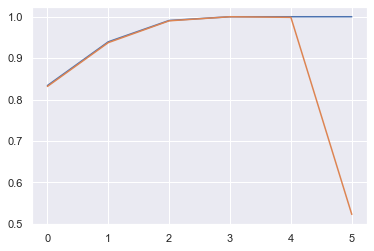

In [69]:
plt.plot(arrays[0], label = "train")
plt.plot(arrays[1], label = "test")
plt.show()

In [70]:
def answer_seven():
    
    return 0, 5, 4